## After TOPUP

Image shape: (104, 104, 72)
Affine:
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


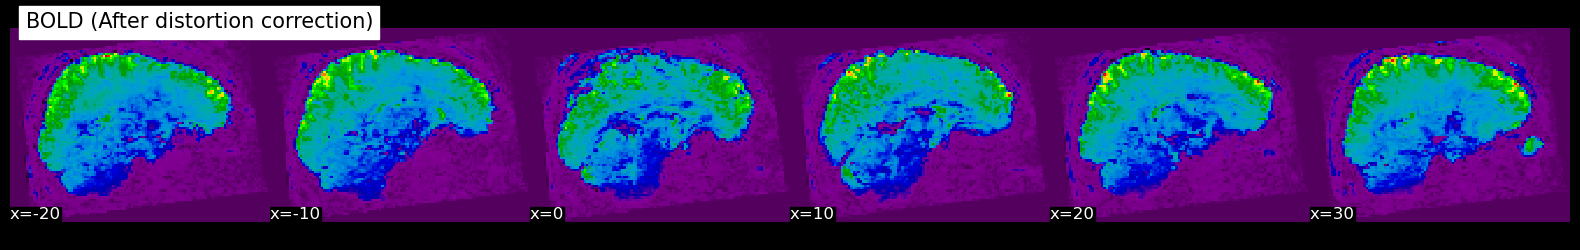

In [24]:
import matplotlib.pyplot as plt
from nilearn import plotting, image

# Path to the EPI image file
epi_image_path = "/Users/heejungj/Documents/projects_local/visualsnow_source/TST/sub-002/sub-002_task-restopen_run-05_boldcorrected.nii.gz"

# Load the EPI image
epi_img = image.load_img(epi_image_path)
third_volume = image.index_img(epi_img, 2)

# Plot the EPI montage
# plotting.plot_epi(third_volume, display_mode="mosaic", title="EPI Montage (3rd Volume)", cut_coords=10)
print("Image shape:", third_volume.shape)
print("Affine:\n", third_volume.affine)

plotting.plot_epi(
    third_volume,
    display_mode="x",
    title="BOLD (After distortion correction)",
    cut_coords=[-20, -10, 0, 10, 20, 30]  # Specify the slice coordinates
)

# Show the plot
plt.show()


## source image (before TOPUP)

Image shape: (104, 104, 72)
Affine:
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


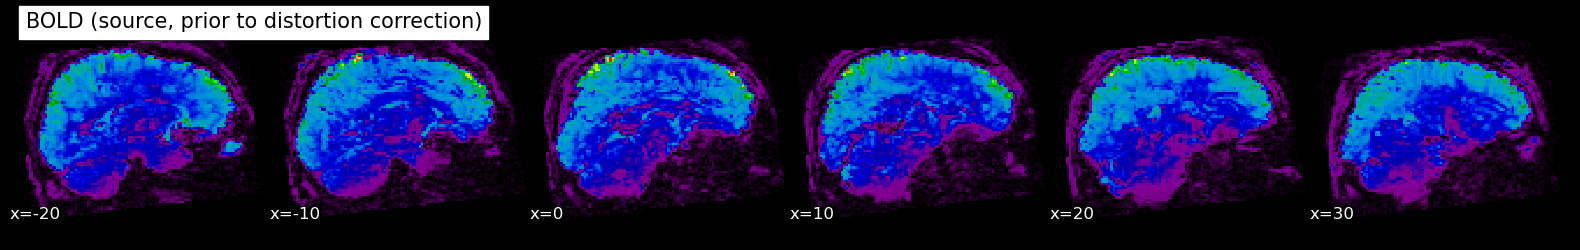

In [25]:
import matplotlib.pyplot as plt
from nilearn import plotting, image

# Path to the EPI image file
source_fname = "/Users/heejungj/Documents/projects_local/visualsnow_source/sub-002/func/sub-002_task-restopen_run-05_bold.nii.gz"

# Load the EPI image
source_img = image.load_img(source_fname)
third_source = image.index_img(source_img, 2)

# Plot the EPI montage
# plotting.plot_epi(third_volume, display_mode="mosaic", title="EPI Montage (3rd Volume)", cut_coords=10)
print("Image shape:", third_source.shape)
print("Affine:\n", third_source.affine)

plotting.plot_epi(
    third_source,
    display_mode="x",
    title="BOLD (source, prior to distortion correction)",
    cut_coords=[-20, -10, 0, 10, 20, 30]  # Specify the slice coordinates
)

# Show the plot
plt.show()
